In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from dataset import KITTIDataset
import tqdm
from matplotlib import pyplot as plt
import numpy as np
import time
from model import SparseConv2d,MyFCN,FCN32s
train_data = KITTIDataset(num=500,file="train")
test_data = KITTIDataset(num=100,file="val")

In [2]:
model = MyFCN(in_channel=1,n_class=1)

# 超参数

In [3]:
batch_size = 8
num_epochs = 20
lr = 1e-3
weight_decay = 5e-4
optimizer = torch.optim.Adam(model.parameters(),lr=lr,weight_decay=weight_decay)
criterion = torch.nn.L1Loss(reduce='mean')
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.__class__.__name__

'MyFCN'

In [4]:
train_dataloader = DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=batch_size,shuffle=True)

In [5]:
losses = []
model.train()
torch.save(model.state_dict(),f"model/{model.__class__.__name__}_epoch{0}.pt")
for epoch in tqdm.tqdm(range(num_epochs)):
    for i, (images, groundtruth) in enumerate(train_dataloader):
        images = images.to(device)
        groundtruth = groundtruth.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, groundtruth)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    torch.save(model.state_dict(),f"model/{model.__class__.__name__}_epoch{epoch+1}.pt")
    losses.append(loss.item())

100%|██████████| 20/20 [33:11<00:00, 99.59s/it] 


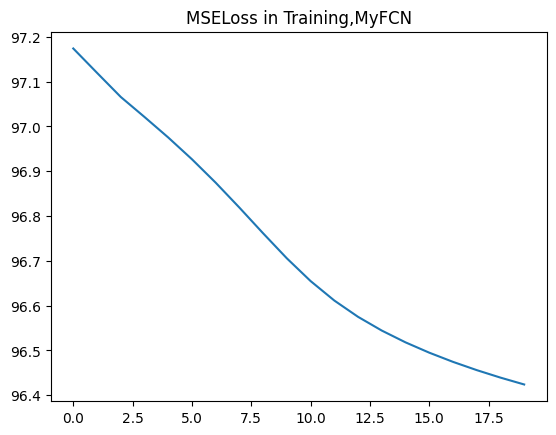

In [42]:
plt.plot(np.array(losses))
plt.title(f"{criterion.__class__.__name__} in Training,{model.__class__.__name__}")
time_ = time.asctime().replace(" ","_")
plt.savefig(f"imgs/{criterion.__class__.__name__}_{model.__class__.__name__}_imgs_{len(train_data)}_{hash(time.asctime())}")

In [8]:
a = torch.ones(2,2)
b = a
a=a/2
a,b

(tensor([[0.5000, 0.5000],
         [0.5000, 0.5000]]),
 tensor([[1., 1.],
         [1., 1.]]))